# HEART DISEASE DATASET
- __Sex__
    - Male = 1
    - Female = 0
- __cp: Chest Pain__
    - 0 : __Typical Angina__: Caused by physical aspects (like squeezing, burning etc) or due to stress.
    - 1 : __Atypical Angina__: A sensation of squeezing that occurs when muscles in chest due not get oxygenated blood.
    - 2 : __Non-Anginal Pain__: Heart Pain in patients who do not have any Heart Disease.
    - 3 : __Asymptomatic__: The pain which neither causes or exhibits any symptoms of diseases.
- __fbs: Fasting Blood Sugar: An overnight fasting (~12 hrs) i.e. no eating & drinking water only. And then performing a diabetic blood test next morning__
    - if _value_ >120
        - 1 : True
        - 0 : False
- __trestbps: Resting blood pressure on admittance to hospital.__
    - blood pressure < 120
        - 0 : Normal
        - 1 : High
- __col: Serum cholestrol level__
    - 0 : Normal (<200)
    - 1 : High (>200)
- __restecg: Resting ECG__
    - 0 : normal
    - 1 : Having ST-T wave abnormality
    - 2 : Left Ventricule Hypertrophy as per Estes' Criteria
- __thalach: Maximum heart rate achieved__
    - 0 : Ideal/Normal betwene 60% - 80% of (220-age)
    - 1 : Low (less than 60%)
    - 2 : Hihg (greater than 80%)
- __exang: Exercise induced angina__
    - 1 : yes
    - 0 : no
- __slope : ST Segment Slope__
    - 0 : Unslopping
    - 1 : Flat
    - 2 : Downslopping
- __thal: Thalassemia: A blood disorder which causes lack of Haemoglobin in blood.__
    - 1 : Normal
    - 2 : Fixed
    - 3 : Reversable Defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
import sklearn.metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

%matplotlib inline
cf.go_offline()
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Null Values

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

In [6]:
df['age'].iplot(kind='hist')

The data is distributed normally across the age groups.

<AxesSubplot:xlabel='target', ylabel='count'>

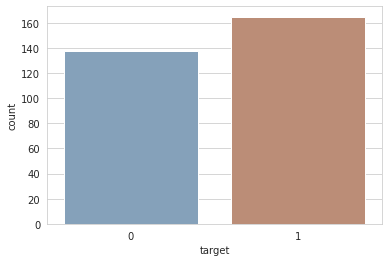

In [7]:
sns.countplot(x='target', data=df, palette='twilight_shifted')

The Target variable is almost equally distributed

1    207
0     96
Name: sex, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

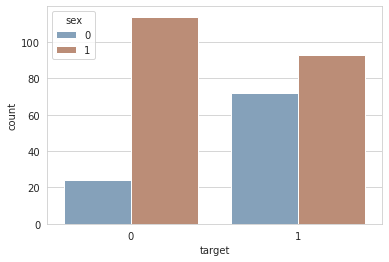

In [8]:
print(df['sex'].value_counts())
sns.countplot(x='target', hue='sex', data=df, palette='twilight_shifted')

1 - Male <br>
0 - Female <br>
Male to Female ratio is 2:1 <br>
The number of females diagnosed with HD is almost thrice to that of wiht No HD where as the number of males is almost equal.

<AxesSubplot:xlabel='target', ylabel='count'>

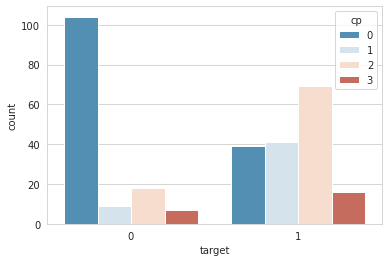

In [9]:
sns.countplot(x='target', data=df, hue='cp', palette='RdBu_r')

0 - Typical Angina: Caused by physical aspects (like squeezing, burning etc) or due to stress. <br>
1 - Atypical Angina: A sensation of squeezing that occurs when muscles in chest due not get oxygenated blood. <br>
2 - Non-Anginal Pain: Heart Pain in patients who do not have any Heart Disease. <br>
3 - Asymptomatic: The pain which neither causes or exhibits any symptoms of diseases.

Chest pain is one of the common symptom of Heart Disease <br>
Most of the people who reported Chest Pain were not diagnosed with HD, as the pain they were experiencing was Typical Angina, which is caused by Stress or physical activities.<br>
Whereas the maximum number of people diagnosed with HD, experienced Non-Anginal pain.

In [10]:
def impute_bp(bp):
    if bp <= 120:
        return 0
    else:
        return 1

df['c_trestbps'] = df['trestbps'].apply(impute_bp)

<AxesSubplot:xlabel='c_trestbps', ylabel='count'>

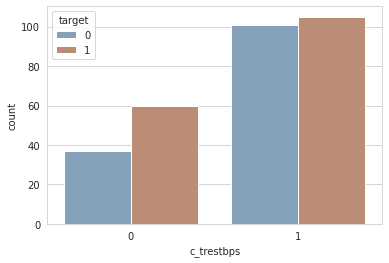

In [11]:
sns.countplot(x='c_trestbps', data=df, hue='target', palette='twilight_shifted')

In [12]:
def impute_chol(chol):
    if 125 <= chol <= 200:
        return 0
    elif chol > 200:
        return 1
    else:
        return 2

df['c_chol'] = df['chol'].apply(impute_chol)

<AxesSubplot:xlabel='c_chol', ylabel='count'>

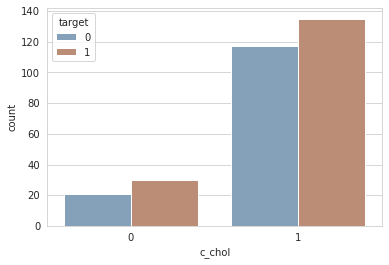

In [13]:
sns.countplot(x='c_chol', data=df, hue='target', palette='twilight_shifted')

<AxesSubplot:xlabel='restecg', ylabel='count'>

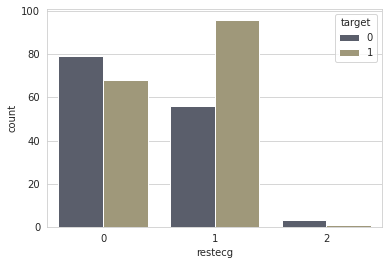

In [14]:
sns.countplot(x='restecg', data=df, hue='target', palette='cividis')

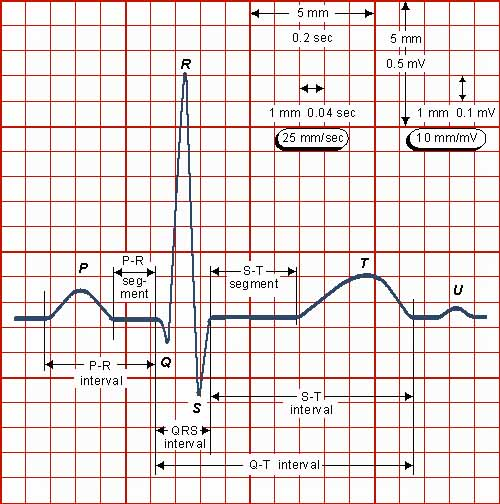


0 - Normal <br>
1 - Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) (Refer image below)<br>
2 - Left Ventricule Hypertrophy as per Estes' Criteria <br>
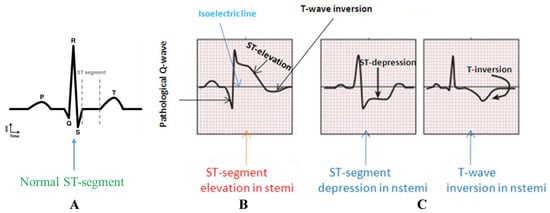

<AxesSubplot:xlabel='fbs', ylabel='count'>

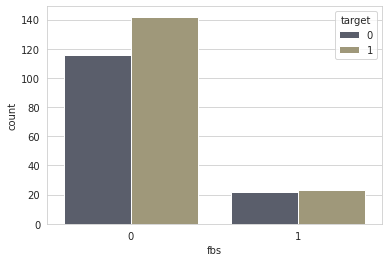

In [15]:
sns.countplot(x='fbs', data=df, hue='target', palette='cividis')

Fasting Blood Sugar <br>
1 - High (> 120mg/dl) <br>
0 - Normal

In [16]:
def impute_thalach(col):
    a_rate = col[1]
    m_rate = 220 - col[0]
    lt_rate = (m_rate * 60)/100
    ht_rate = (m_rate * 80)/100
    
    if lt_rate <= a_rate <= ht_rate:
        return 0 #Normal
    elif a_rate < lt_rate:
        return 1 #Low
    elif a_rate > ht_rate:
        return 2

df['c_thalach'] = df[['age', 'thalach']].apply(impute_thalach, axis=1)

Thalach is the maximum heart rate of a person.<br>
Ideally, a person should have a heart rate between 60% - 80% of (220-Age).<br>
Hence, categorising the maximum heart rate of a person into below categories <br>
0 - Ideal Max. Heart rate (b/w 60% to 80% of 220-Age)<br>
1 - Low max. heart rate (less than 60% of 220-age)<br>
2 - High Max.Heart rate (higher than 80% of 220-age)

<AxesSubplot:xlabel='c_thalach', ylabel='count'>

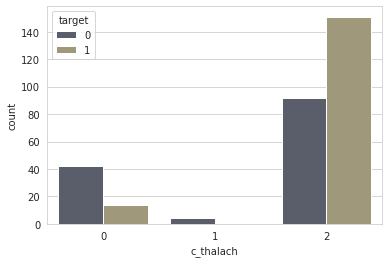

In [17]:
sns.countplot(x='c_thalach', data=df, hue='target', palette='cividis')

People who had a low Max. Heart rate were less diagnosed with HD, whereas people with Higher Max. Heart rate were diagnosed more with HD.

<AxesSubplot:xlabel='exang', ylabel='age'>

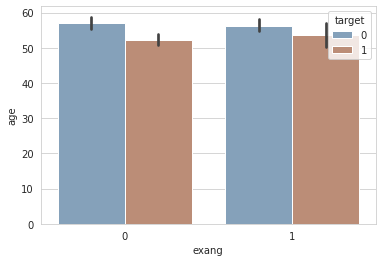

In [18]:
sns.barplot(x='exang', y='age', hue='target', data=df, palette='twilight_shifted')

It is not a good indicator of heart disease as the healthy & unhealthy population disctribution is almost the same

<AxesSubplot:xlabel='slope', ylabel='count'>

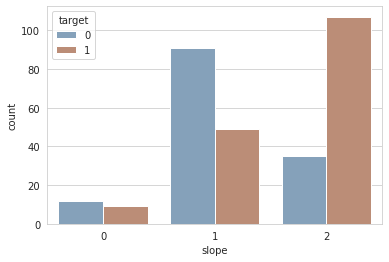

In [19]:
sns.countplot(x='slope', data=df, hue='target', palette='twilight_shifted')

 0 - Upslopping <br>
 1 - Flat <br>
 2 - Downslopping <br>
 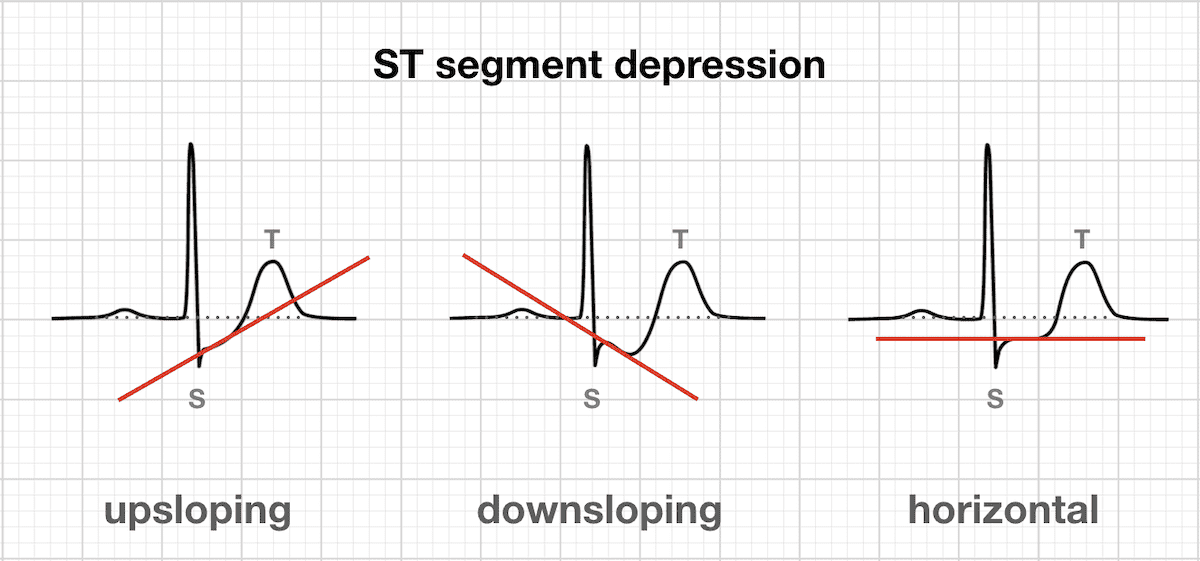

<AxesSubplot:xlabel='ca', ylabel='count'>

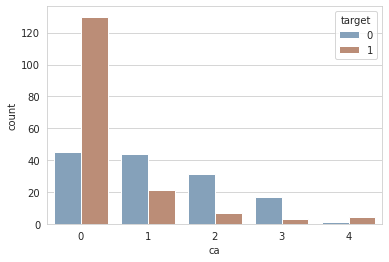

In [20]:
sns.countplot(x='ca', data=df, hue='target', palette='twilight_shifted')

Flouroscopy tells the flow of blood in coronary arteries. <br>
Here 0, 1, 2, 3, 4 represents number of major vessels illuminated during Flouroscopy.<br>
Thus, people with 0 vessels were more prone to be diagnosed with HD

<AxesSubplot:xlabel='thal', ylabel='count'>

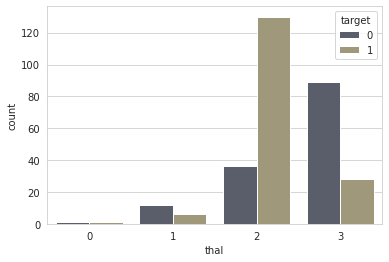

In [21]:
sns.countplot(x='thal', data=df, hue='target', palette='cividis')

Thalassemia is a blood disorder.<br>
1 - Normal <br>
2 - Fixed defect<br>
3 - Reversable Defect<br>
0 - Outlier <br>
Patients with Fixxed defects have a higher incidence with the Heart Disease.

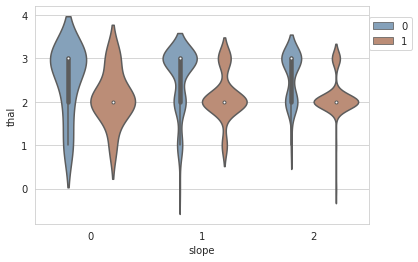

In [22]:
sns.violinplot(x='slope', y='thal', hue='target', data=df, palette='twilight_shifted')
plt.legend(loc=(1.0,0.8))

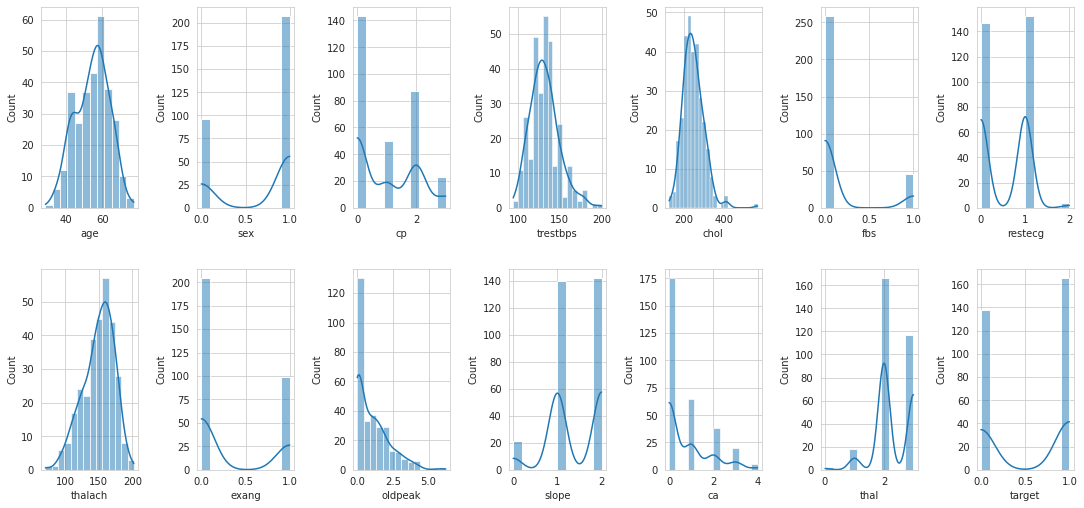

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15,7))
index = 0
axs = axes.flatten()
for col in df.columns[:14]:
    sns.histplot(df[col], kde=True, ax=axs[index], palette='cividis')
    index += 1
plt.tight_layout(pad=0.5, h_pad=3.0, w_pad=1.5)

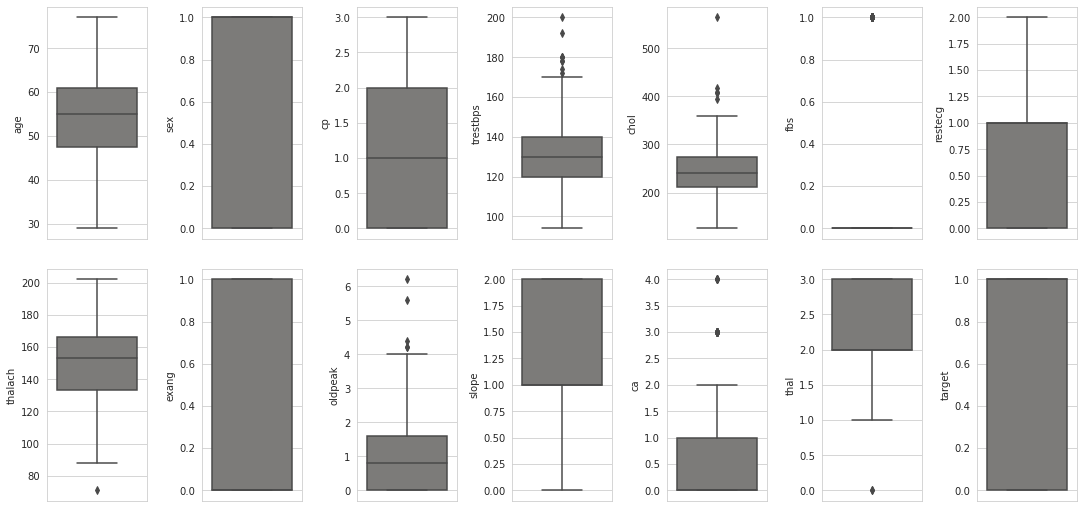

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15,7))
index = 0
axs = axes.flatten()
for col in df.columns[:14]:
    sns.boxplot(y=col, data=df, ax=axs[index], palette='cividis')
    index += 1
plt.tight_layout(pad=0.5, h_pad=3.0, w_pad=1.5)

Features like Thalach, trestbps, chol, age are distributd over a large range of data and therefore the range has to be standardised for effective model.

# DATA PREPROCESSING

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,c_trestbps,c_chol,c_thalach
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,1,2


In [26]:
df.drop(df[df['restecg'] == 2].index, inplace=True)
df.drop(df[df['thal'] == 0].index, inplace=True)

RestECG has been categorized as Normal (0), ST-T wave Abnormality (1) & Left Ventricular Hypertrophy (2)
The number of patients categorized as 2 are relatively very small as compared to other two. Thus treating 2 as outlier & removing it.<br>
No Information was given for thal == 0, hence dropping it.

#### UNORDERED COLUMNS
Changing the continuous values to categorical values has shifted the target column amidst the feature columns. <br>
Shifting Target column at the end (for better clarity on heatmap).

In [27]:
col = list(df.columns.values)
col.remove('target')
col.append('target')
df = df.reindex(columns=col)
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,c_trestbps,c_chol,c_thalach,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,2,1


<AxesSubplot:>

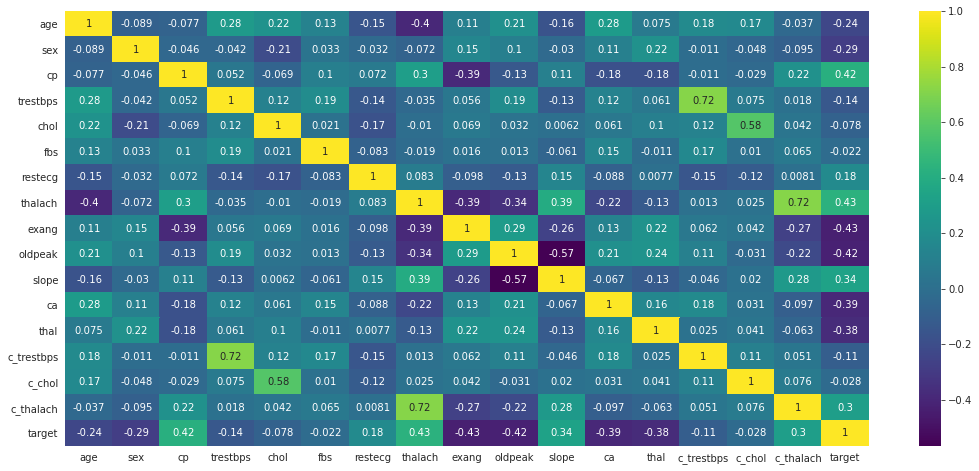

In [28]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

The columns __fbs__, __trestbps__ & __chol__ shows very __low__ correlation with the target variable, hence droping it as a feature.<br>
We have converted __thalach__ into categorical values, therefore we will be using __c_thalach__ instead of Thalach

# MODEL

In [29]:
tmp = {'LR':[], 'DTREE': [], 'Naive B': [], 'RDTREE': [], 'SVC':[], 'KNN': []}
X = df.drop(['trestbps', 'chol', 'thalach', 'fbs', 'c_trestbps', 'c_chol', 'target'], axis=1)
Y = df['target']
s = StandardScaler()
X = s.fit_transform(X)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.3)
kfold = StratifiedKFold(5)

lr = LogisticRegression()
tree = DecisionTreeClassifier()
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=600)
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=10)

data = {'LR':lr, 'DTREE': tree, 'Naive B': nb, 'RDTREE': rf, 'SVC':svc, 'KNN': knn}
for j in data.keys():
    train_result = cross_val_score(data[j], X, Y, cv=kfold)
    print(j)
    print("\t Mean Accuracy: {0}\n\tMaximum Accuracy: {1}\n\tMinimum Accuracy: {2}".format(np.mean(train_result),\
                                                                                          train_result.max(),\
                                                                                          train_result.min()))

LR
	 Mean Accuracy: 0.8381920903954801
	Maximum Accuracy: 0.8833333333333333
	Minimum Accuracy: 0.7796610169491526
DTREE
	 Mean Accuracy: 0.7506214689265537
	Maximum Accuracy: 0.8135593220338984
	Minimum Accuracy: 0.6779661016949152
Naive B
	 Mean Accuracy: 0.8145197740112995
	Maximum Accuracy: 0.9
	Minimum Accuracy: 0.7288135593220338
RDTREE
	 Mean Accuracy: 0.817909604519774
	Maximum Accuracy: 0.9
	Minimum Accuracy: 0.7457627118644068
SVC
	 Mean Accuracy: 0.8180225988700565
	Maximum Accuracy: 0.8666666666666667
	Minimum Accuracy: 0.711864406779661
KNN
	 Mean Accuracy: 0.8313559322033898
	Maximum Accuracy: 0.8833333333333333
	Minimum Accuracy: 0.7796610169491526


The highest Mean Accuracy is given by below models:<br>
__LOGISTIC REGRESSION__ & __KNN__ <br> <br>
Model, __KNN__ & __Logistic Regression__ shows the maximum accuracy of 88.3%
<br>
Let's find out the random state at which the models gives the highest accuracy

In [30]:
tmp = {'LR':[], 'DTREE': [], 'Naive B': [], 'RDTREE': [], 'SVC':[], 'KNN': []}
for i in range(0,110):
    X = df.drop(['trestbps', 'chol', 'thalach', 'fbs', 'c_trestbps', 'c_chol', 'target'], axis=1)
    Y = df['target']
    s = StandardScaler()
    X = s.fit_transform(X)

    X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.3, random_state=i)


    lr = LogisticRegression()
    tree = DecisionTreeClassifier()
    nb = GaussianNB()
    rf = RandomForestClassifier(n_estimators=600)
    svc = SVC()
    knn = KNeighborsClassifier(n_neighbors=10)

    data = {'LR':lr, 'DTREE': tree, 'Naive B': nb, 'RDTREE': rf, 'SVC':svc, 'KNN': knn}
    for j in data.keys():
        data[j].fit(X_TRAIN, Y_TRAIN)
        pred = data[j].predict(X_TEST)
        cm = mt.confusion_matrix(Y_TEST, pred)
        TP = cm[0][0]
        TN = cm[1][1]
        FN = cm[1][0]
        FP = cm[0][1]
        accuracy = ((TP + TN)/(TP + TN + FP + FN))*100
        tmp[j].append(accuracy)

In [31]:
fg = pd.DataFrame(tmp, columns=tmp.keys())

In [32]:
fg.iplot()

Three models (LR, RDTREE, SVC) are giving their maximum efficiency at random state = 21. <br>
In Cross_Val_Score, the model K NEAREST NEIGHBORS & LR gives maximum accuracy. <br>
Further, during random state evaluation, the maximum efficiency achieved by __LOGISTIC REGRESSION__ is 90.0% where as __KNearest Neighbors__ give a mximum efficiency of 91.1 %. <br>
Thus, __KNN__ will the most suitable model for Heart disease classification at __random_state = 34__